# Motivation

Historically, the United States has been a destination for immigrants from all over the world. There are many reasons for this, but above all prosperity seems to be the common draw that most seek as a prize to call this land home.

I've always wondered if being an immigrant determined the potential personal income in this country. Are immigrants destined to earn less than their local counterparts? or having a foreign heritage positively influences the pay scale?

In this work, I explore The Adult dataset, originally provided by the US Census Bureau, and now hosted on the [UCI machine learning repository](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html). These data is result of the annual income survey conducted in 1994.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context("poster")

In [3]:
data_fn = Path('../data/adult.csv')

In [4]:
assert data_fn.is_file()

In [5]:
df = pd.read_csv(data_fn)

In [6]:
df.shape

(48842, 15)

In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data description

There are 48842 samples on this data, with 15 columns:

1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. class: >50K, <=50K

It is unfortunate that the target column (`class`) has been binned for income values delimited by $50K. This prevents understanding the exact distribution of income, yet we can still test if the proportion of immigrants (column `native-country`) is different in each income class.

Let's first check for missing values on the `native-country` column.

In [8]:
df['native-country'].value_counts(normalize=True, dropna=False)

United-States                 0.897424
Mexico                        0.019471
?                             0.017546
Philippines                   0.006040
Germany                       0.004218
Puerto-Rico                   0.003767
Canada                        0.003726
El-Salvador                   0.003173
India                         0.003092
Cuba                          0.002825
England                       0.002600
China                         0.002498
South                         0.002355
Jamaica                       0.002170
Italy                         0.002150
Dominican-Republic            0.002109
Japan                         0.001884
Guatemala                     0.001802
Poland                        0.001781
Vietnam                       0.001761
Columbia                      0.001740
Haiti                         0.001536
Portugal                      0.001372
Taiwan                        0.001331
Iran                          0.001208
Greece                   

There are a few (1.9%) samples missing this feature. Lets drop them.

In [9]:
cond0 = df['native-country'] != '?'
df = df.loc[cond0, :]

In [10]:
df['native-country'].value_counts(normalize=True, dropna=False).head()

United-States    0.913452
Mexico           0.019819
Philippines      0.006148
Germany          0.004293
Puerto-Rico      0.003835
Name: native-country, dtype: float64

Next, let's define a new column to determine if the worker is an immigrant.

In [11]:
df['immigrant'] = ~df['native-country'].isin(['United-States', 'Outlying-US(Guam-USVI-etc)']) 

In [12]:
df['immigrant'].value_counts(normalize=True, dropna=False)

False    0.913931
True     0.086069
Name: immigrant, dtype: float64

In [13]:
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,immigrant
21360,53,Private,127671,7th-8th,4,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,False
40012,61,Private,477209,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,54,United-States,<=50K,False
22650,56,Private,159724,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K,False
16685,28,Private,166481,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0,2179,40,Puerto-Rico,<=50K,True
18161,24,Private,282202,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,0,0,40,El-Salvador,<=50K,True
22793,37,Self-emp-not-inc,188774,Bachelors,13,Never-married,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,>50K,False
26582,27,Private,157941,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K,False
19514,52,Private,141301,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K,False
41112,24,Private,321666,Assoc-acdm,12,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,False
45913,51,Self-emp-inc,230095,Assoc-voc,11,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K,False


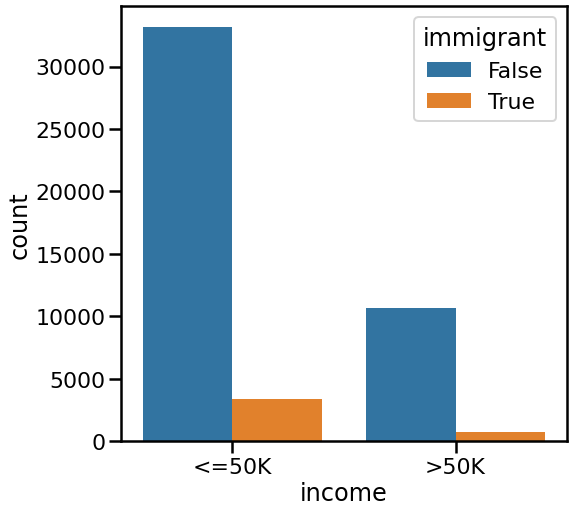

In [14]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='income', hue='immigrant', data=df)

# What is the difference in population proportions of adult US workers self-identified as immigrant reporting an income less than 50K or more than 50k?

**Populations**: All adult US workers self-identified as immigrants.

**Parameter of interest**: Difference in population proportions.

In [15]:
samples = df.groupby(['income', 'immigrant']).size().reset_index(name='counts')

In [16]:
samples

,income,immigrant,counts
0,<=50K,False,33160
1,<=50K,True,3358
2,>50K,False,10695
3,>50K,True,772


In [17]:
lt_local, lt_imm, mt_local, mt_imm = samples['counts']

In [18]:
lt_prop = lt_imm / (lt_local + lt_imm)

In [19]:
mt_prop = mt_imm / (mt_local + mt_imm)

In [20]:
print(f'The proportion of immigrant worker earning $50K or less is: {lt_prop:.3f}')

The proportion of immigrant worker earning $50K or less is: 0.092


In [21]:
print(f'The proportion of immigrant worker earning more than $50K is: {mt_prop:.3f}')

The proportion of immigrant worker earning more than $50K is: 0.067


In [22]:
prop_diff = lt_prop - mt_prop

print(f'The difference between these proportions is: {prop_diff:.3f}')

The difference between these proportions is: 0.025


## Confidence Interval
Estimate 95% confidence interval for the population proportions difference

$(\hat{p}_1 - \hat{p}_2) \pm z_{a/2} \sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1}+\frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}$

In [23]:
n1 = (lt_local + lt_imm)
a = (lt_prop * (1 - lt_prop)) / n1

n2 = (mt_local + mt_imm)
b = (mt_prop * (1 - mt_prop)) / n2

margin = 1.96 * np.sqrt(a + b)

In [24]:
print(f'The 95% confidence interval is: ({prop_diff - margin:.3f}, {prop_diff + margin:.3f})')

The 95% confidence interval is: (0.019, 0.030)


## Hypothesis test
Now let's perform a hypothesis test to understand if the change in proportions is statistically significant.

$H_0$: There is no difference in population proportion, with a 95% confidence

$H_0 : p_1 - p_2 = 0$

$H_a : p_1 - p_2 \ne 0$


$Z = \frac{(\hat{p}_1-\hat{p}_2) - 0}{\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1}+\frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}}$


In [25]:
z = prop_diff / np.sqrt(a + b)

In [26]:
import scipy

p_value = scipy.stats.norm.pdf(abs(z))*2 # two - sided test

if np.isclose(p_value, 0):
    p_value = 0

In [27]:
print(f"The test z-score is: {z:.3f}, which corresponds to a p-value of: {p_value}")

The test z-score is: 8.841, which corresponds to a p-value of: 0


Let's check my calculations with the results from a library, in case I made a mistake.

In [28]:
from statsmodels.stats.proportion import proportions_ztest

# https://sonalake.com/latest/hypothesis-testing-of-proportion-based-samples/

significance = 0.05

sample_success_a, sample_size_a = (lt_imm, n1)
sample_success_b, sample_size_b = (mt_imm, n2)

successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])

stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
    print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
    print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: 8.204, p_value: 0.000
Reject the null hypothesis - suggest the alternative hypothesis is true


The `statsmodels` library produces similar results.

# Conclusion

With 95\% confidence, the population proportion for adult US workers self-identified as immigrants earning \\$50K or less is 1.9 to 3.0\% higher than the population of US workers self-identified as immigrants earning more than \\$50K.

In other words, the proportion of immigrants earning $50K or less is about 2.5\% more of those earning more. For example, if the US population is represented by 10000 people, this means that:
1. 6910 will be locals earning \\$50k or less
2. 700 will be immigrants earning \\$50k or less
3. 2229 locals earning more than \\$50k
4. 161 will be immigrants earning more than \\$50k

Even though the change in proportion can take a relatively small number (1.9\% to 3\%), this change is statistically significant, and thus, we need to reject the hypothesis of the two populations begin the same. In other words, the proportion of immigrant workers decreases from 9\% to 6.5\%, between the lower and higher income categories. This reduction is roughly 28\% (2.5\% in 9\%), which indicates the tendency to have more immigrants earning $50K or less.